In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
data=pd.read_csv("../data/exoplanet_dataset.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   P_NAME                5599 non-null   object 
 1   P_DETECTION           5599 non-null   object 
 2   P_DISCOVERY_FACILITY  5599 non-null   object 
 3   P_YEAR                5599 non-null   int64  
 4   P_UPDATE              5599 non-null   object 
 5   P_MASS                5592 non-null   float64
 6   P_MASS_ORIGIN         5599 non-null   object 
 7   P_RADIUS              5592 non-null   float64
 8   P_PERIOD              5350 non-null   float64
 9   P_SEMI_MAJOR_AXIS     5595 non-null   float64
 10  P_ECCENTRICITY        4822 non-null   float64
 11  P_INCLINATION         4288 non-null   float64
 12  P_OMEGA               1659 non-null   float64
 13  S_NAME                5599 non-null   object 
 14  S_NAME_HD             971 non-null    object 
 15  S_NAME_HIP           

In [4]:
useless_features = [
    'P_NAME', 'P_DETECTION', 'P_DISCOVERY_FACILITY', 'P_YEAR', 'P_UPDATE',
    'P_MASS_ORIGIN', 'S_NAME', 'S_NAME_HD', 'S_NAME_HIP', 'S_RA', 'S_DEC',
    'S_RA_STR', 'S_DEC_STR', 'S_RA_TXT', 'S_DEC_TXT', 'S_CONSTELLATION',
    'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'
]

In [5]:
clean_data = data.drop(columns=useless_features)

In [6]:
X = clean_data.drop(columns=['P_HABITABLE'])
y = clean_data['P_HABITABLE']

In [7]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns

In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5599 entries, 0 to 5598
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   P_MASS             5592 non-null   float64
 1   P_RADIUS           5592 non-null   float64
 2   P_PERIOD           5350 non-null   float64
 3   P_SEMI_MAJOR_AXIS  5595 non-null   float64
 4   P_ECCENTRICITY     4822 non-null   float64
 5   P_INCLINATION      4288 non-null   float64
 6   P_OMEGA            1659 non-null   float64
 7   S_TYPE             2021 non-null   object 
 8   S_MAG              5380 non-null   float64
 9   S_DISTANCE         5578 non-null   float64
 10  S_TEMPERATURE      5380 non-null   float64
 11  S_MASS             5595 non-null   float64
 12  S_RADIUS           5367 non-null   float64
 13  S_METALLICITY      5166 non-null   float64
 14  S_AGE              4392 non-null   float64
 15  S_LOG_LUM          5364 non-null   float64
 16  S_LOG_G            5353 

In [9]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# hand j
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

In [10]:
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

X_preprocessed = pd.concat([X[numerical_cols].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

X_preprocessed.fillna(X_preprocessed.mean(), inplace=True)




In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
si = X_test.iloc[0]


In [13]:
si

P_MASS                3.780000
P_RADIUS              1.770000
P_PERIOD             14.667108
P_SEMI_MAJOR_AXIS     0.113000
P_ECCENTRICITY        0.000000
                       ...    
S_TYPE_TEMP_nan       0.000000
P_TYPE_TEMP_Cold      0.000000
P_TYPE_TEMP_Hot       1.000000
P_TYPE_TEMP_Warm      0.000000
P_TYPE_TEMP_nan       0.000000
Name: 4440, Length: 350, dtype: float64

In [14]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
y_pred = model.predict(X_train)

print("Acc:", accuracy_score(y_train, y_pred))



print("Classification Report:\n", classification_report(y_train, y_pred))



Acc: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4421
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        34

    accuracy                           1.00      4479
   macro avg       1.00      1.00      1.00      4479
weighted avg       1.00      1.00      1.00      4479



In [16]:
import joblib
joblib.dump(model, "model.pkl")



['model.pkl']

In [17]:
new_data = X_test.iloc[470:490]
predictions = model.predict(new_data)
print("Predictions:", predictions)


Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [18]:
clean_data['P_HABITABLE'] = clean_data['P_HABITABLE'].replace(2, 1)
# -----------> changes the 2 to 1 to clean and decrease the data bias

In [19]:
clean_data[clean_data['P_HABITABLE'] == 1].count()

P_MASS               70
P_RADIUS             70
P_PERIOD             70
P_SEMI_MAJOR_AXIS    70
P_ECCENTRICITY       60
P_INCLINATION        40
P_OMEGA              31
S_TYPE               47
S_MAG                69
S_DISTANCE           70
S_TEMPERATURE        70
S_MASS               70
S_RADIUS             70
S_METALLICITY        63
S_AGE                49
S_LOG_LUM            70
S_LOG_G              70
P_ESCAPE             70
P_POTENTIAL          70
P_GRAVITY            70
P_DENSITY            70
P_HILL_SPHERE        70
P_DISTANCE           70
P_PERIASTRON         70
P_APASTRON           70
P_DISTANCE_EFF       70
P_FLUX               70
P_TEMP_EQUIL         70
P_TEMP_SURF          70
P_TYPE               70
S_TYPE_TEMP          70
S_LUMINOSITY         70
S_SNOW_LINE          70
S_ABIO_ZONE          70
S_TIDAL_LOCK         70
P_HABZONE_OPT        70
P_HABZONE_CON        70
P_TYPE_TEMP          70
P_HABITABLE          70
dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
#smote for imbalanced data

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)




print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1108
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         7

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



In [22]:
count = 0
new_data = X_test.iloc[0:5600]
predictions = model.predict(new_data)

for prediction in predictions:
    if prediction > 0:
        print(new_data)
        count += 1

print("Predictions:", predictions)
print("Count of positive predictions:", count)


          P_MASS  P_RADIUS      P_PERIOD  P_SEMI_MAJOR_AXIS  P_ECCENTRICITY  \
4440     3.78000     1.770     14.667108              0.113        0.000000   
2471  3248.20630    12.500  79940.819612              2.770        0.076407   
3316     8.00000     2.750     50.697494              0.286        0.000000   
80     292.40360    20.512      1.809886              0.033        0.000000   
4805     8.10000     2.770     16.514043              0.122        0.000000   
...          ...       ...           ...                ...             ...   
2201  2126.28270    12.700    121.710000              0.530        0.350000   
3784  1880.90850    12.800   5859.089900              6.426        0.273000   
4072    66.40000     1.690      7.542427              0.079        0.000000   
3008     6.35660     2.400      5.397920              0.060        0.060000   
898     77.86796    10.500  79940.819612              1.449        0.076407   

      P_INCLINATION  P_OMEGA      S_MAG  S_DISTANCE

In [48]:
count = 0
count_0 = 0
new_data = X_test.iloc[0:910]
predictions = model.predict(new_data)
predictions

count = sum(predictions > 0)
count

12

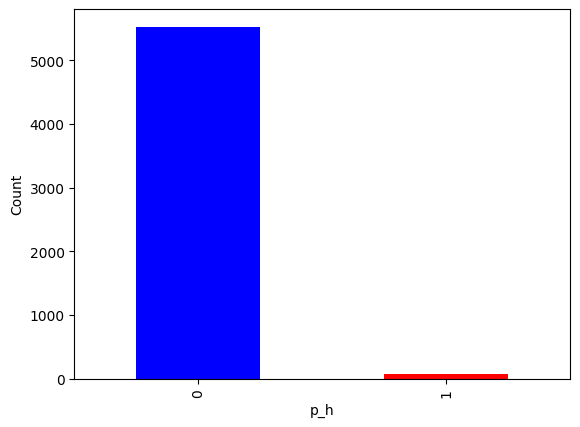

In [24]:
import matplotlib.pyplot as plt
col_count = clean_data['P_HABITABLE'].value_counts()

col_count.plot(kind='bar', color=['blue', 'red'])

plt.xlabel('p_h')
plt.ylabel('Count')
plt.show()